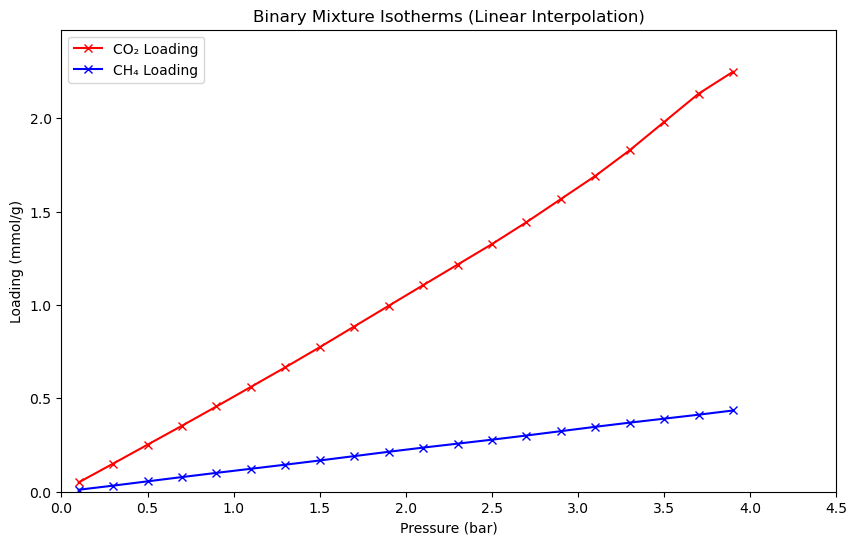

In [19]:
import pandas as pd
import numpy as np
import pyiast
import matplotlib.pyplot as plt


df_co2 = pd.read_csv("CO2_IRMOF1.csv")
df_ch4 = pd.read_csv("CH4_IRMOF1.csv")


co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="Loading(mmol/g)",
                                            pressure_key="Pressure(bar)")
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                            loading_key="Loading(mmol/g)",
                                            pressure_key="Pressure(bar)")

# Define the pressure range from 0.1 to 4.0 bar with increments of 0.2
pressure_range = np.arange(0.1, 4.1, 0.2)

# Calculate the loading for each pressure in the range for both components
co2_loading = [co2_isotherm.loading(p) for p in pressure_range]
ch4_loading = [ch4_isotherm.loading(p) for p in pressure_range]


plt.figure(figsize=(10, 6))
plt.plot(pressure_range, co2_loading, label='CO₂ Loading', marker='x',color='r')
plt.plot(pressure_range, ch4_loading, label='CH₄ Loading', marker='x', color='b')
plt.title('Binary Mixture Isotherms (Linear Interpolation)')
plt.xlabel('Pressure (bar)')
plt.ylabel('Loading (mmol/g)')
plt.legend()
plt.grid(False)
plt.xlim(0, 4.5)  
plt.ylim(0, max(max(co2_loading), max(ch4_loading)) * 1.1)  
plt.show()


In [20]:
selectivity_pressures = [0.1, 1, 2, 3]

y_CO2 = 0.4  
y_CH4 = 1 - y_CO2  

selectivity_results = {}

for pressure in selectivity_pressures:
    q_CO2 = co2_isotherm.loading(pressure) 
    q_CH4 = ch4_isotherm.loading(pressure)   
    
    # Calculate selectivity
    if q_CH4 > 0:  # To avoid division by zero
        selectivity = q_CO2 / (q_CH4 * (y_CO2 / y_CH4))
    else:
        selectivity = float('inf')  
    
    selectivity_results[pressure] = selectivity


for pressure, selectivity in selectivity_results.items():
    print(f"Selectivity of CO₂ over CH₄ at {pressure} bar: {selectivity:.2f}")


Selectivity of CO₂ over CH₄ at 0.1 bar: 7.08
Selectivity of CO₂ over CH₄ at 1 bar: 6.82
Selectivity of CO₂ over CH₄ at 2 bar: 6.99
Selectivity of CO₂ over CH₄ at 3 bar: 7.27
